In [57]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt 
from alpha_vantage.timeseries import TimeSeries
from config import api_key # Use your own key 

In [58]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')



In [59]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2024-05-20 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [60]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-05-20 19:59:00,174.925,175.04,174.91,175.040,7662.0
2024-05-20 19:58:00,174.880,174.94,174.87,174.910,2049.0
2024-05-20 19:57:00,174.875,174.88,174.87,174.875,1423.0
2024-05-20 19:56:00,174.920,174.92,174.88,174.880,1007.0
2024-05-20 19:55:00,174.870,174.92,174.83,174.900,3373.0


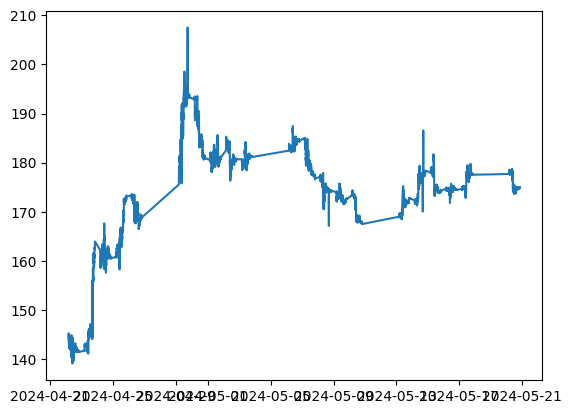

In [61]:
plt.plot(data['4. close'])

In [62]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [63]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [64]:
data.loc['2024-05-20']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2024-05-20 19:59:00,174.925,175.04,174.91,175.040,7662.0,2024-05-20,19:59:00
2024-05-20 19:58:00,174.880,174.94,174.87,174.910,2049.0,2024-05-20,19:58:00
2024-05-20 19:57:00,174.875,174.88,174.87,174.875,1423.0,2024-05-20,19:57:00
2024-05-20 19:56:00,174.920,174.92,174.88,174.880,1007.0,2024-05-20,19:56:00
2024-05-20 19:55:00,174.870,174.92,174.83,174.900,3373.0,2024-05-20,19:55:00
...,...,...,...,...,...,...,...
2024-05-20 04:04:00,177.980,178.05,177.88,177.960,2298.0,2024-05-20,04:04:00
2024-05-20 04:03:00,177.850,178.00,177.80,177.950,1479.0,2024-05-20,04:03:00
2024-05-20 04:02:00,177.710,177.85,177.66,177.810,1985.0,2024-05-20,04:02:00


In [65]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8211 entries, 2024-04-22 09:30:00 to 2024-05-20 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       8211 non-null   float64
 1   high       8211 non-null   float64
 2   low        8211 non-null   float64
 3   close      8211 non-null   float64
 4   volume     8211 non-null   float64
 5   TradeDate  8211 non-null   object 
 6   time       8211 non-null   object 
dtypes: float64(5), object(2)
memory usage: 513.2+ KB


In [66]:
market.groupby('TradeDate').agg({'low': 'min', 'high': 'max'})

,low,high
TradeDate,,
2024-04-22,138.802,144.440
2024-04-23,141.110,147.260
2024-04-24,157.510,167.970
2024-04-25,158.360,170.880
2024-04-26,166.370,172.120
2024-04-29,184.540,198.870
2024-04-30,182.840,190.950
2024-05-01,179.010,185.860
2024-05-02,176.020,184.600


In [67]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2024-04-22 09:32:00,139.565,139.890,138.802,139.330,1306242.0,2024-04-22,09:32:00
2024-04-23 09:44:00,141.470,141.600,141.110,141.140,367505.0,2024-04-23,09:44:00
2024-04-24 12:48:00,157.855,157.860,157.510,157.595,227357.0,2024-04-24,12:48:00
2024-04-25 09:30:00,158.960,159.042,158.360,158.780,2250949.0,2024-04-25,09:30:00
2024-04-26 14:49:00,166.510,166.744,166.370,166.744,346967.0,2024-04-26,14:49:00
2024-04-29 09:55:00,184.900,185.420,184.540,184.875,1006681.0,2024-04-29,09:55:00
2024-04-30 15:23:00,183.000,183.114,182.840,182.917,342186.0,2024-04-30,15:23:00
2024-05-01 11:20:00,179.233,179.410,179.010,179.117,287592.0,2024-05-01,11:20:00
2024-05-02 10:20:00,176.400,176.770,176.020,176.327,551281.0,2024-05-02,10:20:00


In [68]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2024-04-22 09:56:00,143.910,144.440,143.900,144.394,598017.0,2024-04-22,09:56:00
2024-04-23 12:30:00,146.860,147.260,146.860,147.149,612888.0,2024-04-23,12:30:00
2024-04-24 10:08:00,167.660,167.970,166.750,166.850,1503512.0,2024-04-24,10:08:00
2024-04-25 15:22:00,169.860,170.880,169.840,170.220,1200421.0,2024-04-25,15:22:00
2024-04-26 11:41:00,171.960,172.120,171.825,171.890,292768.0,2024-04-26,11:41:00
2024-04-29 12:30:00,198.560,198.870,197.620,197.870,972952.0,2024-04-29,12:30:00
2024-04-30 09:47:00,190.250,190.950,190.000,190.180,648980.0,2024-04-30,09:47:00
2024-05-01 15:00:00,185.130,185.860,185.120,185.469,393485.0,2024-05-01,15:00:00
2024-05-02 09:33:00,184.380,184.600,183.830,184.104,537536.0,2024-05-02,09:33:00
